## 🛒 Amazon Product Dataset: Data Cleaning & Preprocessing
#### Project: Amazon Sales Analysis
#### Team: [Elena Moysidou, Antonis Karousis, Christos Karlaftis]

## 📝 Project Overview
#### This notebook focuses on cleaning and preprocessing the Amazon Products dataset. The goal is to transform the raw data into a structured format suitable for analysis and visualization.

## 🔧 Key Steps:
##### Handling missing values and data inconsistencies.
##### Converting currency columns (Rupees to Euros).
##### Cleaning string columns (Ratings, Percentages).
##### Feature Engineering (Creating new categories).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rupee-Euro exchange rate constant
INR_TO_EUR_RATE = 0.011

def clean_amazon_data(df):
    """
    Accepts the raw Amazon DataFrame and returns the cleaned dataset.
    """
    # 1. Select relevant columns.
    selected_columns = [
        'product_id', 'product_name', 'category', 'discounted_price',
        'actual_price', 'discount_percentage', 'rating', 'rating_count',
        'about_product', 'user_id', 'user_name', 'product_link'
    ]
    df_clean = df[selected_columns].copy()

    # 2. Drop rows with missing 'rating_count'.
    df_clean = df_clean.dropna(subset=['rating_count'])

    # 3. Clean 'discount_percentage': remove '%' and cast to float.
    df_clean['discount_percentage'] = (
        df_clean['discount_percentage']
        .astype(str)
        .str.replace("%", "", regex=False)
        .astype(float)
    )

    # 4. Convert 'rating' to numeric, coercing errors to NaN.
    df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')
    
    # Drop rows with NaN values in 'rating' resulting from coercion.
    df_clean = df_clean.dropna(subset=['rating'])

    # 5. Clean 'rating_count': remove commas and cast to float.
    df_clean['rating_count'] = (
        df_clean['rating_count']
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

    # 6. Extract 'main_category' from 'category' string.
    df_clean['main_category'] = df_clean['category'].str.split('|').str[0]

    # 7. Helper function for price cleaning.
    def clean_currency_column(series):
        return (
            series
            .astype(str)
            .str.replace('₹', '', regex=False)
            .str.replace(',', '', regex=False)
            .astype(float)
        )

    # Apply cleaning function to price columns.
    df_clean['discounted_price_float_indian'] = clean_currency_column(df_clean['discounted_price'])
    df_clean['actual_price_float_indian'] = clean_currency_column(df_clean['actual_price'])

    # 8. Convert prices to Euros.
    df_clean['discounted_price_euros'] = df_clean['discounted_price_float_indian'] * INR_TO_EUR_RATE
    df_clean['actual_price_euros'] = df_clean['actual_price_float_indian'] * INR_TO_EUR_RATE

    # Round prices to 2 decimal places.
    df_clean['discounted_price_euros'] = df_clean['discounted_price_euros'].round(2)
    df_clean['actual_price_euros'] = df_clean['actual_price_euros'].round(2)

    return df_clean

# --- Main Execution ---
if __name__ == "__main__":
    # Load the dataset.
    try:
        print("Load the dataset...")
        df = pd.read_csv('amazon.csv')
        
        # Cleaning
        print("Cleaning dataset...")
        cleaned_df = clean_amazon_data(df)
        
        # Display cleaned data info.
        print("\n--- Cleaned Data Info ---")
        cleaned_df.info()
        print("\nFirst 5 rows:")
        print(cleaned_df.head())

        # Save data (optional)
        # cleaned_df.to_csv('amazon_cleaned.csv', index=False)
        # print("Το αρχείο αποθηκεύτηκε ως 'amazon_cleaned.csv'")

    except FileNotFoundError:
        print("Error: File 'amazon.csv' not found.")

Load the dataset...
Cleaning dataset...

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     1462 non-null   object 
 1   product_name                   1462 non-null   object 
 2   category                       1462 non-null   object 
 3   discounted_price               1462 non-null   object 
 4   actual_price                   1462 non-null   object 
 5   discount_percentage            1462 non-null   float64
 6   rating                         1462 non-null   float64
 7   rating_count                   1462 non-null   float64
 8   about_product                  1462 non-null   object 
 9   user_id                        1462 non-null   object 
 10  user_name                      1462 non-null   object 
 11  product_link                   1462 non-n

## ANALYSIS

In [5]:
cleaned_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,product_link,main_category,discounted_price_float_indian,actual_price_float_indian,discounted_price_euros,actual_price_euros
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,399.0,1099.0,4.39,12.09
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,199.0,349.0,2.19,3.84
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,199.0,1899.0,2.19,20.89
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,329.0,699.0,3.62,7.69
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,154.0,399.0,1.69,4.39


### Aggregate data by main category:
##### - 'count' counts the number of products per main category
##### - 'mean' calculates the average price in euros per main category
##### - The resulting DataFrame 'cat_analysis' can be used for plotting or analysis

In [7]:
cat_analysis = cleaned_df.groupby('main_category')['actual_price_euros'].mean()
cat_analysis = cleaned_df.groupby('main_category')['actual_price_euros'].mean().reset_index()
cat_analysis.rename(columns={'actual_price_euros':'mean'}, inplace=True)
cat_analysis = cleaned_df.groupby('main_category').agg(count=('product_id', 'count'),mean=('actual_price_euros', 'mean')).reset_index()
cat_analysis

,main_category,count,mean
0,Car&Motorbike,1,44.000000
1,Computers&Accessories,451,18.553769
2,Electronics,526,111.401046
3,Health&PersonalCare,1,20.900000
4,Home&Kitchen,447,45.823535
5,HomeImprovement,2,8.790000
6,MusicalInstruments,2,14.815000
7,OfficeProducts,31,4.368387
8,Toys&Games,1,1.650000


#### Plot a combined bar and line chart:
##### - Bars show the number of products per main category (count)
##### - Line shows the average price in euros per category (mean)
##### - Categories are sorted from highest to lowest count for easy comparison
##### - Useful to visualize both product distribution and pricing trends

C:\Users\Αντώνης Καρούσης\AppData\Local\Temp\ipykernel_4132\1714828446.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cat_analysis['main_category'], rotation=45, ha='right')


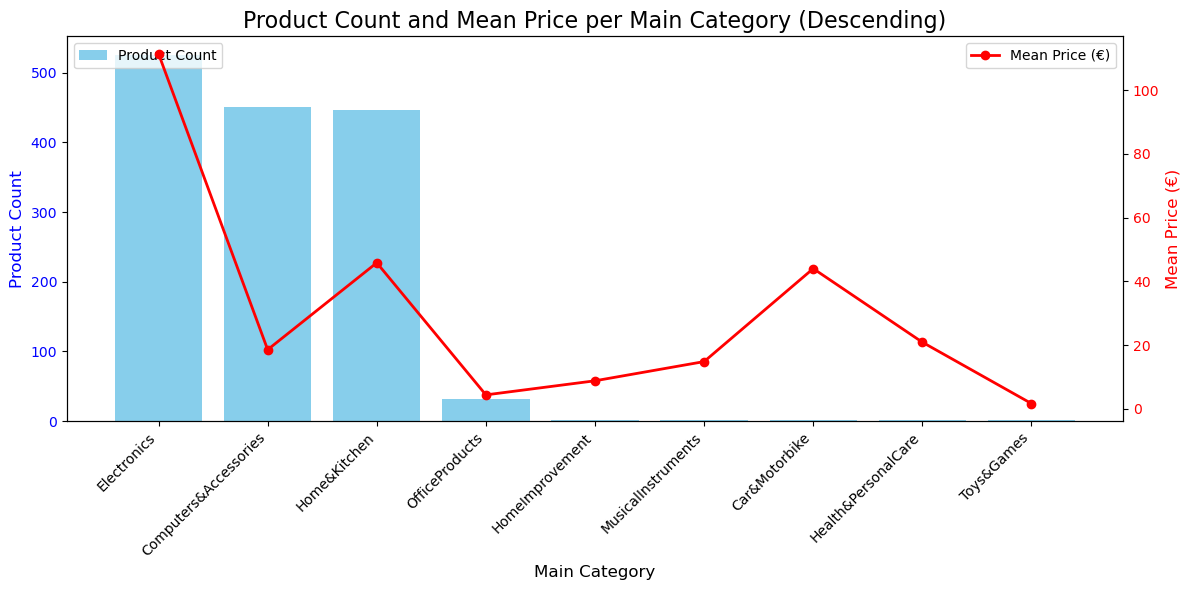

In [8]:
# Aggregate your data
cat_analysis = cleaned_df.groupby('main_category').agg(
    count=('product_id', 'count'),                   # number of products per category
    mean=('actual_price_euros', 'mean')        # average price per category
).reset_index()

# Sort by count descending (highest first)
cat_analysis = cat_analysis.sort_values(by='count', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for product count
bars = ax1.bar(cat_analysis['main_category'], cat_analysis['count'], 
               color='skyblue', label='Product Count')
ax1.set_xlabel('Main Category', fontsize=12)
ax1.set_ylabel('Product Count', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(cat_analysis['main_category'], rotation=45, ha='right')

# Line chart for mean value
ax2 = ax1.twinx()
ax2.plot(cat_analysis['main_category'], cat_analysis['mean'], 
         color='red', marker='o', linewidth=2, label='Mean Price (€)')
ax2.set_ylabel('Mean Price (€)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Product Count and Mean Price per Main Category (Descending)', fontsize=16)
fig.tight_layout()

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [9]:
#Basic statistics for discount percentage
discount_stats = cleaned_df['discount_percentage'].describe()
print(discount_stats)

count    1462.000000
mean       47.672367
std        21.613905
min         0.000000
25%        32.000000
50%        50.000000
75%        63.000000
max        94.000000
Name: discount_percentage, dtype: float64


In [10]:
#Find the category with the highest average discount
discount_by_category = cleaned_df.groupby('main_category')['discount_percentage'].mean().reset_index()
discount_by_category = discount_by_category.sort_values(by='discount_percentage', ascending=False)
print(discount_by_category.head())

           main_category  discount_percentage
5        HomeImprovement            57.500000
1  Computers&Accessories            53.920177
3    Health&PersonalCare            53.000000
2            Electronics            50.828897
6     MusicalInstruments            46.000000


#### Histogram: Distribution of discount percentages

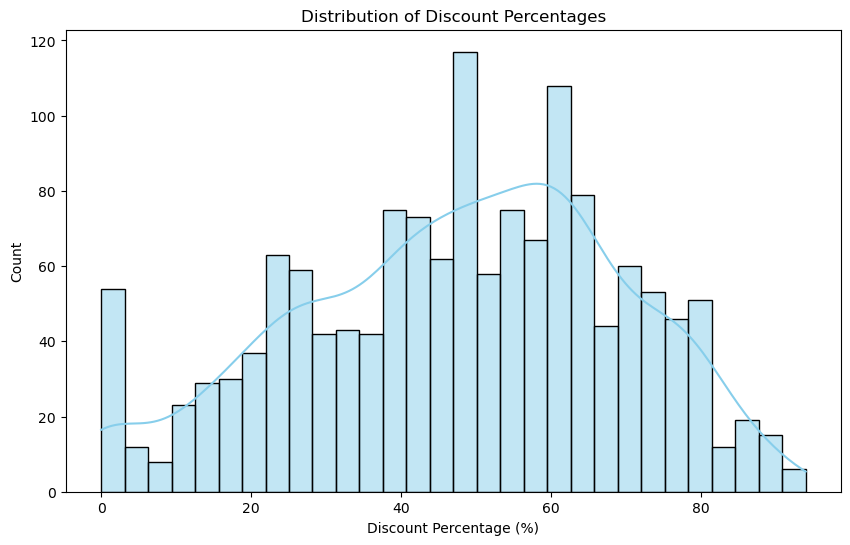

In [11]:
# Shows overall spread of discount values
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df['discount_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Count')
plt.show()

#### Bar chart: Average discount per main category

C:\Users\Αντώνης Καρούσης\AppData\Local\Temp\ipykernel_4132\106653858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


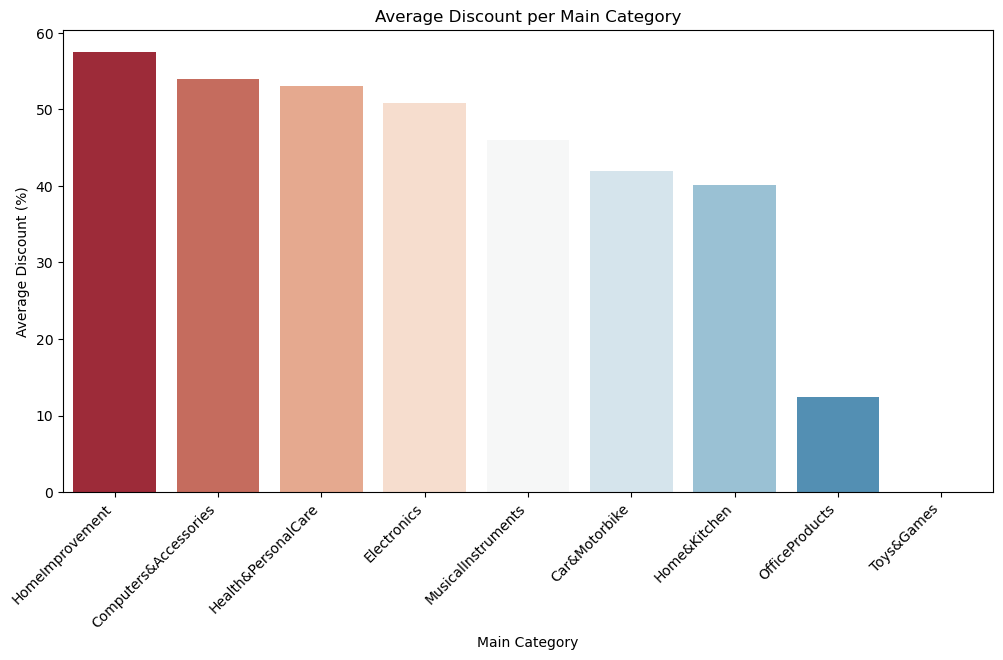

In [12]:
plt.figure(figsize=(12,6))
palette = sns.color_palette("RdBu", n_colors=len(discount_by_category))
sns.barplot(
    x='main_category', 
    y='discount_percentage', 
    data=discount_by_category, 
    palette=palette
)
plt.xticks(rotation=45, ha='right')
plt.title('Average Discount per Main Category')
plt.ylabel('Average Discount (%)')
plt.xlabel('Main Category')
plt.show()

### What are the Top 5 products (highly rated + many comments) and which are the worst?

In [14]:
#Top 5 (with over 500 reviews for validity)
top_5 = cleaned_df[cleaned_df['rating_count'] > 500].sort_values(by='rating', ascending=False).head(5)
print("--- TOP 5 ---")
print(top_5[['product_name', 'rating']])

# Bottom 5
bottom_5 = cleaned_df[cleaned_df['rating_count'] > 500].sort_values(by='rating', ascending=True).head(5)
print("\n--- WORST 5 ---")
print(bottom_5[['product_name', 'rating']])


--- TOP 5 ---
                                           product_name  rating
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...     4.7
1275  Multifunctional 2 in 1 Electric Egg Boiling St...     4.7

--- WORST 5 ---
                                           product_name  rating
1315  Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...     3.0
550   Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...     3.0
1314  ROYAL STEP - AMAZON'S BRAND - Portable Electri...     3.1
1251  akiara - Makes life easy Electric Handy Sewing...     3.1
463   PTron Newly Launched Force X10 Bluetooth Calli...     3.3


In [15]:
#We cut the names to 30 characters to fit in the diagram!
top_5['short_name'] = top_5['product_name'].str[:40] + '...'
bottom_5['short_name'] = bottom_5['product_name'].str[:40] + '...'

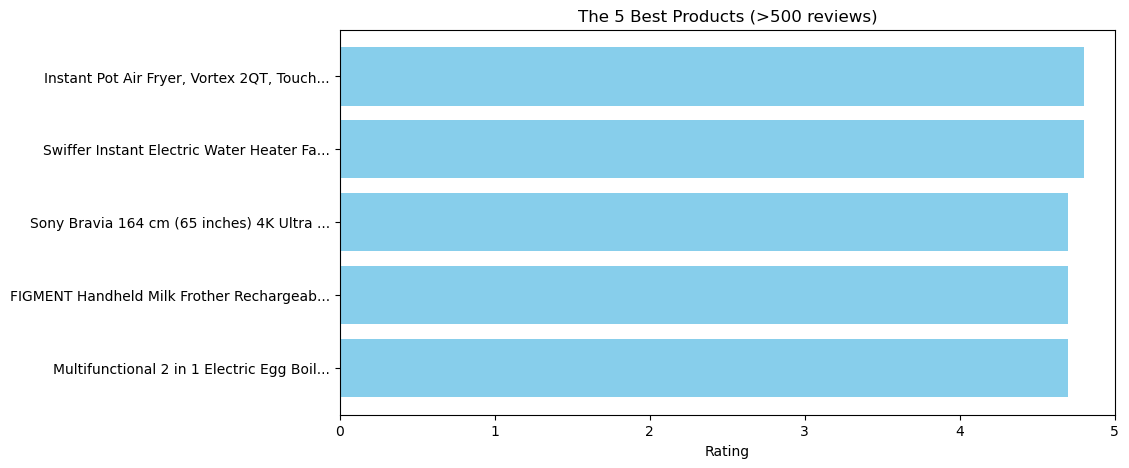

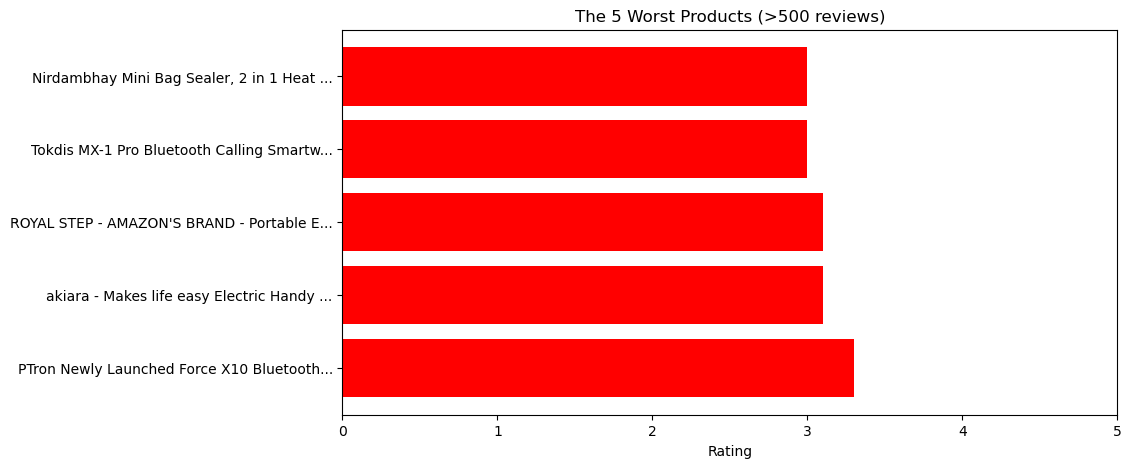

In [16]:
plt.figure(figsize=(10, 5))
plt.barh(top_5['short_name'], top_5['rating'], color='skyblue')

plt.xlabel('Rating')
plt.title('The 5 Best Products (>500 reviews)')
plt.xlim(0, 5) # We define that the score goes from 0 to 5
plt.gca().invert_yaxis() # We flip it over so that the 1st one is on top.
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(bottom_5['short_name'], bottom_5['rating'], color='red')

plt.xlabel('Rating')
plt.title('The 5 Worst Products (>500 reviews)')
plt.xlim(0, 5) # We define that the score goes from 0 to 5
plt.gca().invert_yaxis() # We flip it over so that the 1st one is on top.
plt.show()

#### Finally, are products on Amazon generally good or bad? How many are 5-star and how many are 4-star?

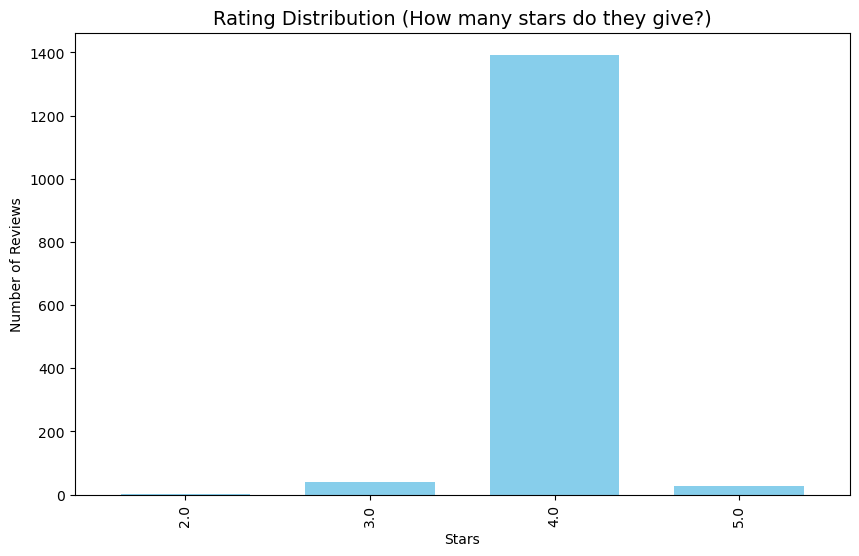

In [17]:
#We round the scores (to have groups: 3, 4, 5)
ratings_counts = cleaned_df['rating'].round().value_counts().sort_index()

#Plot
plt.figure(figsize=(10, 6))

bars=ratings_counts.plot(
    kind='bar',
    color='skyblue',
    width=0.7
)

#Labels
plt.title('Rating Distribution (How many stars do they give?)', fontsize=14)
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')



plt.show()

### The Price of Quality: Analyzing the Correlation Between Cost and User Ratings

###### Let's divide the products into categories according to discounted_price_float_euros.

In [20]:
cleaned_df['price_category'] = pd.qcut(cleaned_df['discounted_price_euros'],q=4,
                                      labels=['Low Prize', 'Economic', 'Normal prize', 'Expensive'])
cleaned_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,product_link,main_category,discounted_price_float_indian,actual_price_float_indian,discounted_price_euros,actual_price_euros,price_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,399.0,1099.0,4.39,12.09,Economic
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,199.0,349.0,2.19,3.84,Low Prize
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,199.0,1899.0,2.19,20.89,Low Prize
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,329.0,699.0,3.62,7.69,Economic
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,154.0,399.0,1.69,4.39,Low Prize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,379.0,919.0,4.17,10.11,Economic
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,2280.0,3045.0,25.08,33.49,Expensive
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28.0,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...",https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen,2219.0,3080.0,24.41,33.88,Expensive
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26.0,4.0,8031.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...",https://www.amazon.in/Havells-Ventilair-230mm-...,Home&Kitchen,1399.0,1890.0,15.39,20.79,Normal prize


In [21]:
# we will check the average rating and rating_count of our prices categories
price_df=cleaned_df.groupby(['price_category'])[['rating','rating_count']].mean()
price_df

,rating,rating_count
price_category,,
Low Prize,4.066848,16306.687500
Economic,4.096206,21629.289973
Normal prize,4.087088,19610.571429
Expensive,4.137396,15637.307479


##### Bar plot for rating and rating count

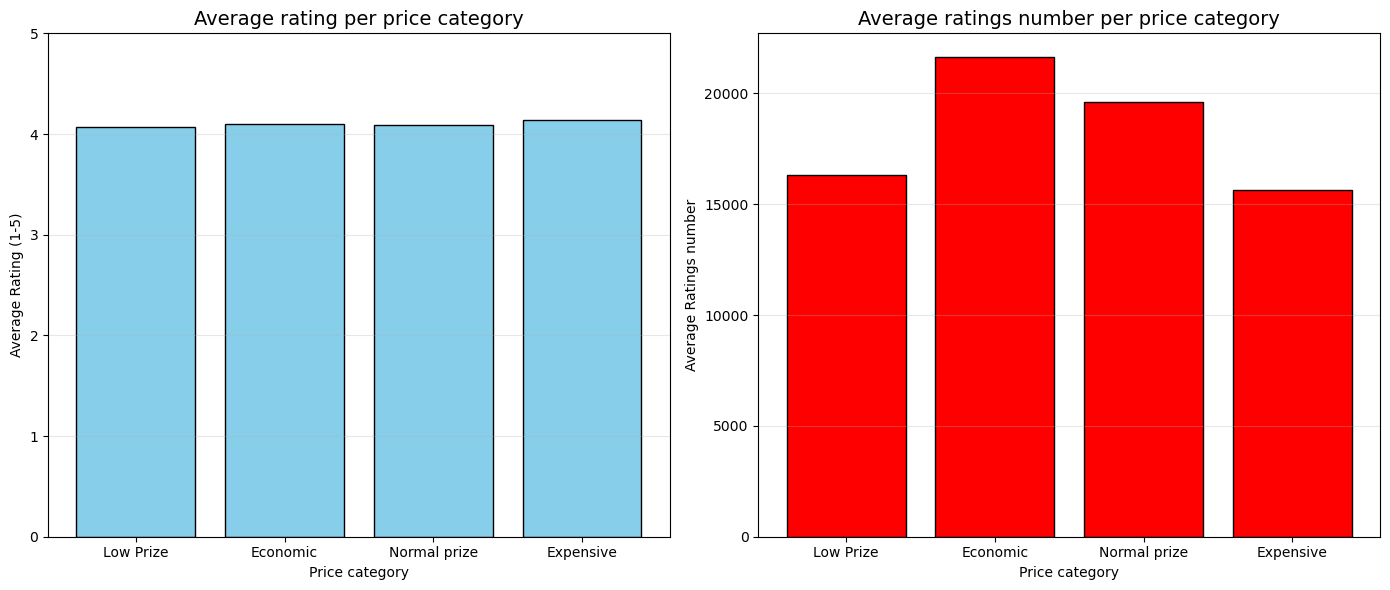

In [22]:
# Bar plot for rating
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. average rating per price category
bars1 = ax1.bar(price_df.index, price_df['rating'], color='skyblue', edgecolor='black')
ax1.set_title('Average rating per price category', fontsize=14)
ax1.set_xlabel('Price category')
ax1.set_ylabel('Average Rating (1-5)')
ax1.set_ylim([0, 5])
ax1.grid(True, alpha=0.3, axis='y')

# 2. Average ratings number per price category
bars2 = ax2.bar(price_df.index, price_df['rating_count'], color='red', edgecolor='black')
ax2.set_title('Average ratings number per price category', fontsize=14)
ax2.set_xlabel('Price category')
ax2.set_ylabel('Average Ratings number')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

##### Box Plot for rating and rating count

C:\Users\Αντώνης Καρούσης\AppData\Local\Temp\ipykernel_4132\2989528554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0],
C:\Users\Αντώνης Καρούσης\AppData\Local\Temp\ipykernel_4132\2989528554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1],


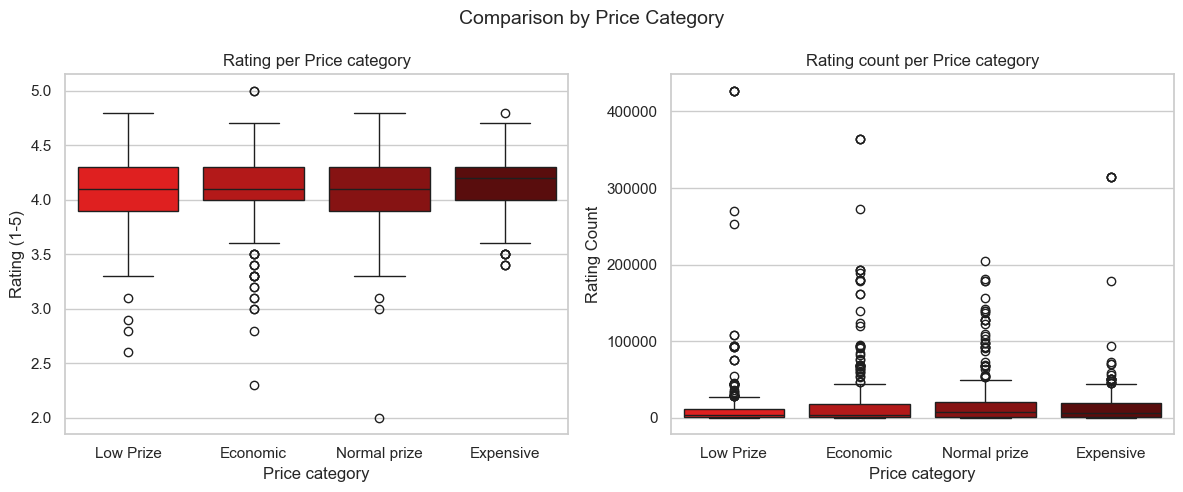

In [23]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


colors = ["#FF0000", "#CC0000", "#990000", "#660000"]

# 1. Rating
sns.boxplot(ax=axes[0], 
            x="price_category", 
            y="rating",
            data=cleaned_df,
            palette=colors,
            )

axes[0].set_title('Rating per Price category', fontsize=12)
axes[0].set_xlabel('Price category')
axes[0].set_ylabel('Rating (1-5)')

# 2. Rating count
sns.boxplot(ax=axes[1], 
            x="price_category", 
            y="rating_count",
            data=cleaned_df,
            palette=colors,
            )

axes[1].set_title('Rating count per Price category', fontsize=12)
axes[1].set_xlabel('Price category')
axes[1].set_ylabel('Rating Count')

# Main Title
plt.suptitle('Comparison by Price Category', fontsize=14)
plt.tight_layout()
plt.show()


##### In the end,is there any correlation between the price and the rating? We are going to find out with the help from the correlation matrix

In [26]:
correlation_matrix = cleaned_df[['discounted_price_euros', 'actual_price_euros', 'rating', 'rating_count']].corr()

In [27]:
correlation_matrix

,discounted_price_euros,actual_price_euros,rating,rating_count
discounted_price_euros,1.000000,0.961910,0.121132,-0.027303
actual_price_euros,0.961910,1.000000,0.122466,-0.036216
rating,0.121132,0.122466,1.000000,0.102235
rating_count,-0.027303,-0.036216,0.102235,1.000000


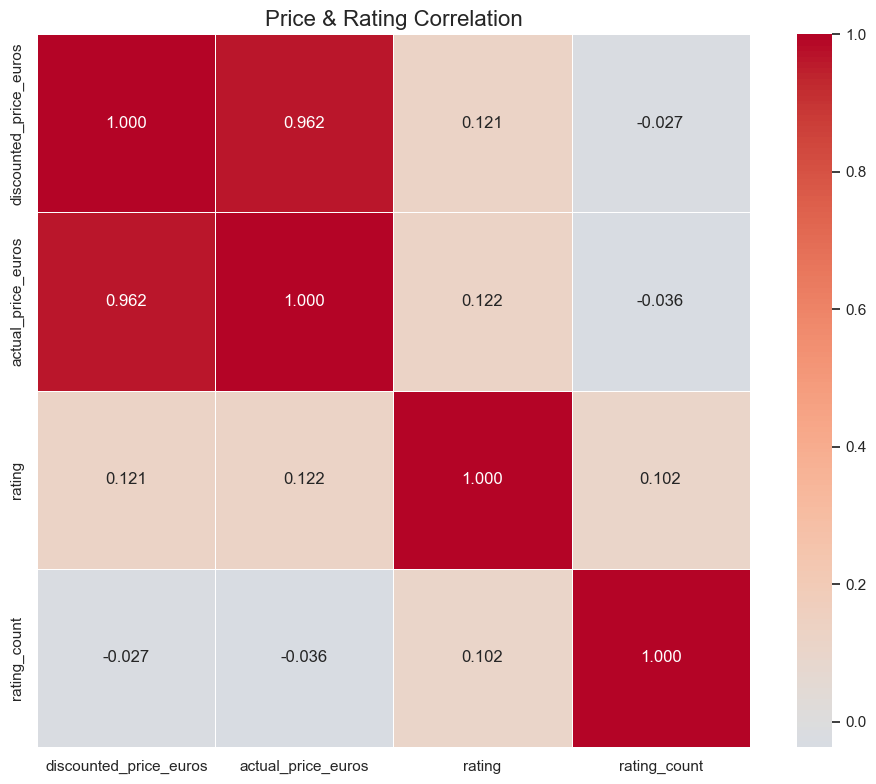

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            square=True,
            linewidths=0.5)
plt.title('Price & Rating Correlation', fontsize=16)
plt.tight_layout()
plt.show()